/tmp/ipython-input-627991145.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').mean()  # Resample to monthly data by taking the mean


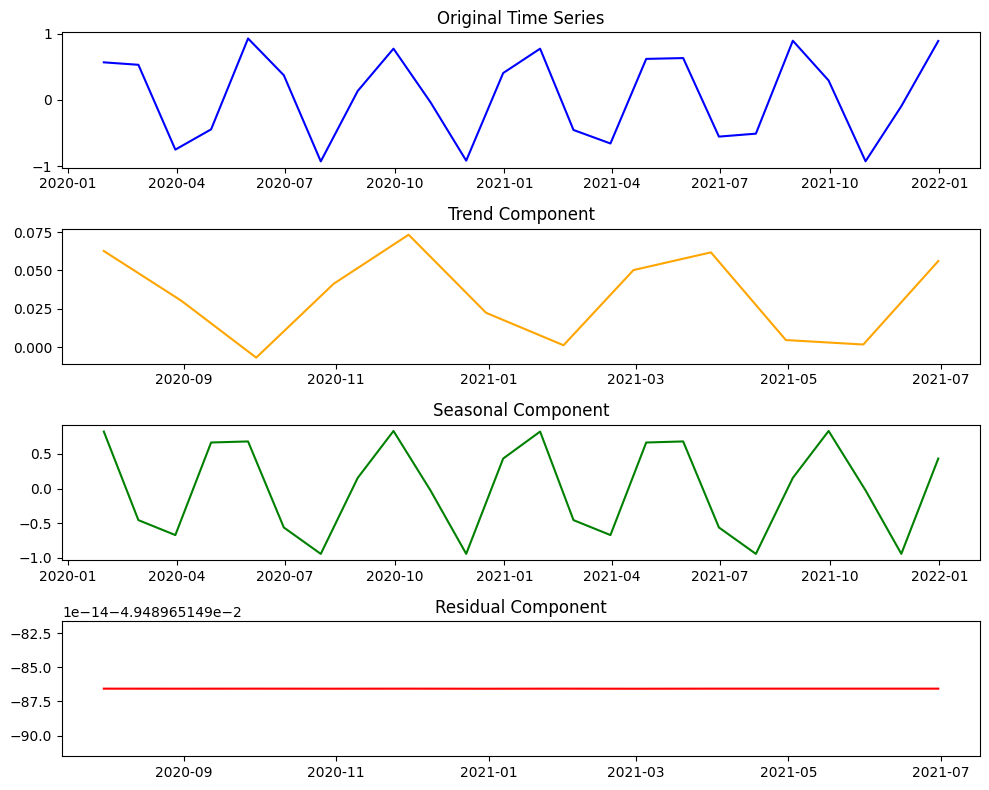

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Create a time series for 2 years (24 months) with daily frequency
dates = pd.date_range(start='2020-01-01', periods=730, freq='D')  # 2 years (730 days)
data = np.sin(np.linspace(0, 40, 730)) + np.random.normal(0, 0.5, 730)  # Simulated data for 2 years

df = pd.DataFrame(data, columns=['TimeSeries'], index=dates)

# Resample the data to monthly frequency (period=12 for monthly seasonality)
df_monthly = df.resample('M').mean()  # Resample to monthly data by taking the mean

# Decompose the monthly time series (period=12 for monthly seasonality)
decomposition = seasonal_decompose(df_monthly['TimeSeries'], model='additive', period=12)

# Extract the components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposition components
plt.figure(figsize=(10, 8))

# Original Time Series Plot
plt.subplot(4, 1, 1)
plt.plot(df_monthly.index, df_monthly['TimeSeries'], label='Original', color='blue')
plt.title('Original Time Series')

# Trend Component Plot
plt.subplot(4, 1, 2)
plt.plot(df_monthly.index, trend, label='Trend', color='orange')
plt.title('Trend Component')

# Seasonal Component Plot
plt.subplot(4, 1, 3)
plt.plot(df_monthly.index, seasonal, label='Seasonal', color='green')
plt.title('Seasonal Component')

# Residual Component Plot
plt.subplot(4, 1, 4)
plt.plot(df_monthly.index, residual, label='Residual', color='red')
plt.title('Residual Component')

plt.tight_layout()
plt.show()